Filename: /Users/maxwang/Documents/projects/CMB_plot/BeamWf_HFI_R3.01/Bl_T_R3.01_fullsky_100hm1x100hm2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  WINDOW FUNCTION    1 TableHDU        26   4001R x 1C   [E15.7]   
['TEMPERATURE']
Filename: /Users/maxwang/Documents/projects/CMB_plot/BeamWf_HFI_R3.01/Bl_T_R3.01_fullsky_143x143.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  WINDOW FUNCTION    1 TableHDU        26   4001R x 1C   [E15.7]   
['TEMPERATURE']
Filename: /Users/maxwang/Documents/projects/CMB_plot/BeamWf_HFI_R3.01/Bl_T_R3.01_fullsky_217x217.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  WINDOW FUNCTION    1 TableHDU        26   4001R x 1C   [E15.7]   
['TEMPERATURE']
Filename: /Users/maxwang/Documents/projects/CMB_plot/BeamWf_HFI_R3.01/Bl_T_R3.01_fullsky

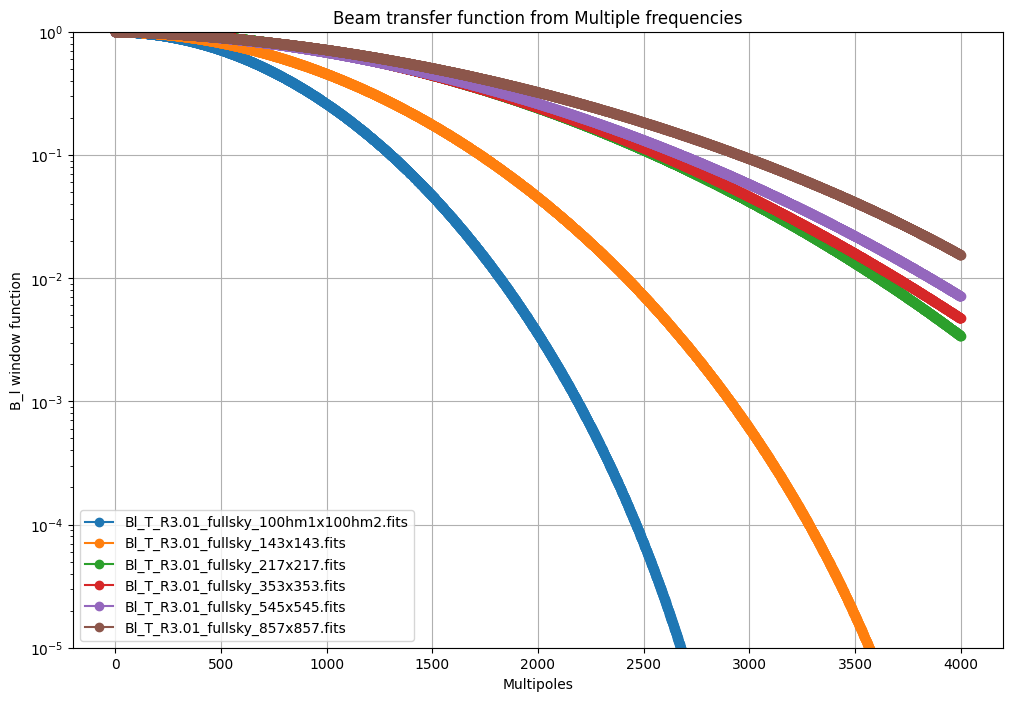

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Define the list of FITS files
HFI = [
    "Bl_T_R3.01_fullsky_100hm1x100hm2.fits",
    "Bl_T_R3.01_fullsky_143x143.fits",  
    "Bl_T_R3.01_fullsky_217x217.fits",
    "Bl_T_R3.01_fullsky_353x353.fits", 
    "Bl_T_R3.01_fullsky_545x545.fits", 
    "Bl_T_R3.01_fullsky_857x857.fits"
]
local_path = "/Users/maxwang/Documents/projects/CMB_plot/BeamWf_HFI_R3.01/"

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each FITS file
for filename in HFI:
    # Open the FITS file
    hfi = fits.open(local_path + filename)
    
    # Inspect the contents to identify the correct extension
    hfi.info()

    # Extract data from the desired extension
    data = hfi[1].data  # Assuming the data is in the first extension

    # Print column names to understand the structure
    print(data.columns.names)

    # Extract temperature data (replace 'T' with the actual column name if necessary)
    temperature = data['Temperature']**2  # Replace 'T' with the actual column name for temperature data

    # Close the FITS file
    hfi.close()

    # Plot the temperature data
    plt.plot(temperature, marker='o', linestyle='-', label=filename)

# Customize the plot
plt.xlabel('Multipoles')  # Adjust the label as necessary
plt.ylabel('B_l window function')  # Adjust the label as necessary
plt.title('Beam transfer function from Multiple frequencies')
plt.grid(True)
plt.yscale('log')
plt.ylim(1e-5, 1)
plt.legend()
plt.show()


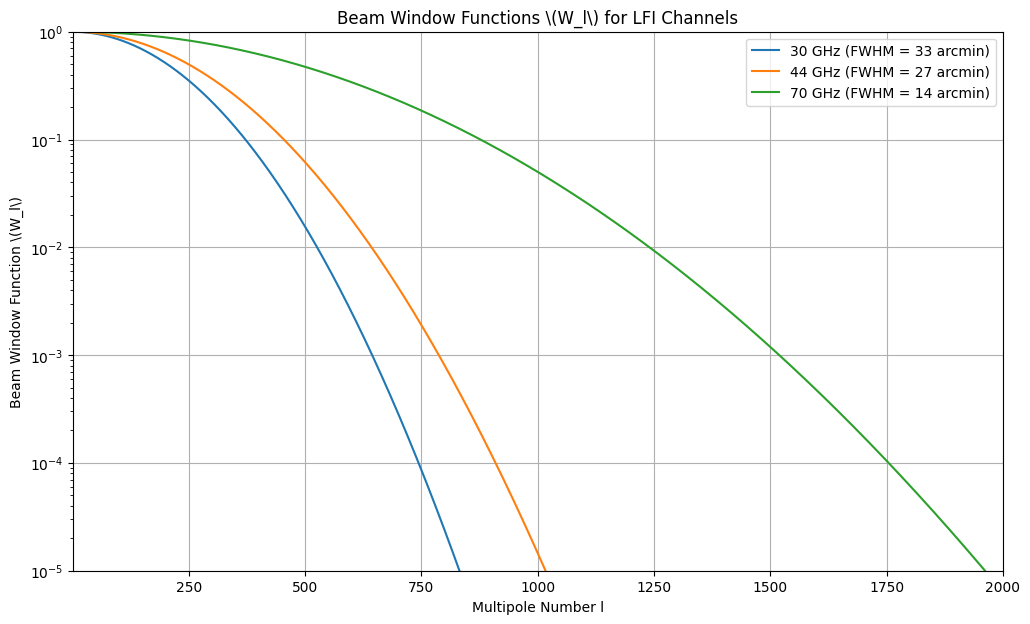

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

# Frequencies for LFI channels (in GHz)
frequencies = [30, 44, 70]
# Beam FWHM for each frequency (in arcminutes)
beam_fwhm = {30: 33, 44: 27, 70: 14}

# Convert arcminutes to radians
def arcmin_to_radians(arcmin):
    return np.radians(arcmin / 60)

# Define a range of l values
lmax = 2000
l_values = np.arange(0, lmax + 1)  # Start from l=0 to match healpy output

# Plot the Beam Window Functions W_l for each LFI channel
plt.figure(figsize=(12, 7))

for freq in frequencies:
    fwhm_rad = arcmin_to_radians(beam_fwhm[freq])
    bl = hp.sphtfunc.gauss_beam(fwhm_rad, lmax=lmax, pol=False)
    Wl = bl**2  # Squaring B_l to get W_l
    plt.plot(l_values, Wl, label=f'{freq} GHz (FWHM = {beam_fwhm[freq]} arcmin)')

plt.xlabel('Multipole Number l')
plt.ylabel('Beam Window Function \(W_l\)')
plt.title('Beam Window Functions \(W_l\) for LFI Channels')
plt.legend()
plt.grid(True)
plt.xlim(1, 2000)  # Adjust x-axis to start from l=1 for clarity
plt.yscale('log')
plt.ylim(1e-5, 1)
plt.show()




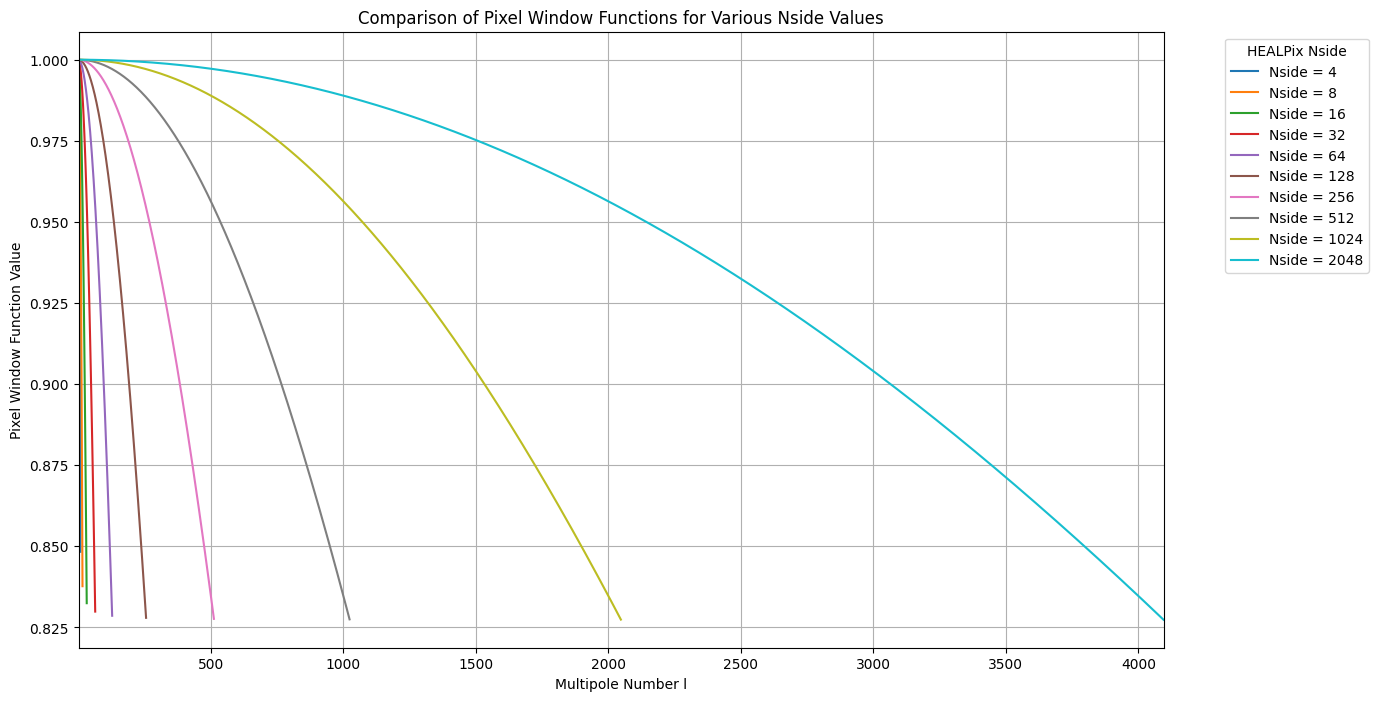

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

# Define different nside values
nsides = [2**n for n in range(2, 12)]  # From 2 to 4096 in powers of 2

# Define the figure for plotting
plt.figure(figsize=(14, 8))

# Iterate over each nside
for nside in nsides:
    lmax = 2 * nside - 1
    l_values = np.arange(0, lmax + 1)  # Array of multipole numbers

    # Get the Pixel Window Function for the specified nside
    pixwin = hp.sphtfunc.pixwin(nside, lmax=lmax, pol=False)

    # Plot the Pixel Window Function
    plt.plot(l_values, pixwin, label=f'Nside = {nside}')

plt.xlabel('Multipole Number l')
plt.ylabel('Pixel Window Function Value')
plt.title('Comparison of Pixel Window Functions for Various Nside Values')
plt.legend(title="HEALPix Nside", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlim(1, 2*max(nsides))  # Adjust x-axis to maximum l from the largest nside
# plt.ylim(1e-5, 1)  # Set y-axis limits to avoid log(0) issues
plt.show()
